# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
num_unique_mice = merged_df["Mouse ID"].nunique()
num_unique_mice

249

In [22]:
duplicated_data = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
if not duplicated_data.empty:
    print("The following mouse IDs have duplicate time points:")
    print(duplicated_data["Mouse ID"].unique())
    merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first", inplace=True)
else:
    print("There are no mouse IDs with duplicate time points.")

The following mouse IDs have duplicate time points:
['g989']


In [23]:
num_unique_mice = merged_df["Mouse ID"].nunique()

In [24]:
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

unique_mice_count = cleaned_df["Mouse ID"].nunique()
print(f"There are {unique_mice_count} unique mice in the cleaned data.")

duplicate_timepoints = cleaned_df[cleaned_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
if len(duplicate_timepoints) > 0:
    print("The following mouse ID(s) have duplicate time points:")
    print(duplicate_timepoints)
    for mouse_id in duplicate_timepoints:
        print(f"\nData for Mouse ID {mouse_id}:")
        print(cleaned_df[cleaned_df["Mouse ID"] == mouse_id])
    cleaned_df = cleaned_df[~cleaned_df["Mouse ID"].isin(duplicate_timepoints)]
    print("\nData for the duplicate mouse(s) has been removed from the cleaned DataFrame.")
unique_mice_count = cleaned_df["Mouse ID"].nunique()
print(f"\nThere are now {unique_mice_count} unique mice in the cleaned data.")


There are 249 unique mice in the cleaned data.

There are now 249 unique mice in the cleaned data.


In [25]:
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [26]:
grouped_df = merged_df.groupby("Drug Regimen")
summary_df = grouped_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

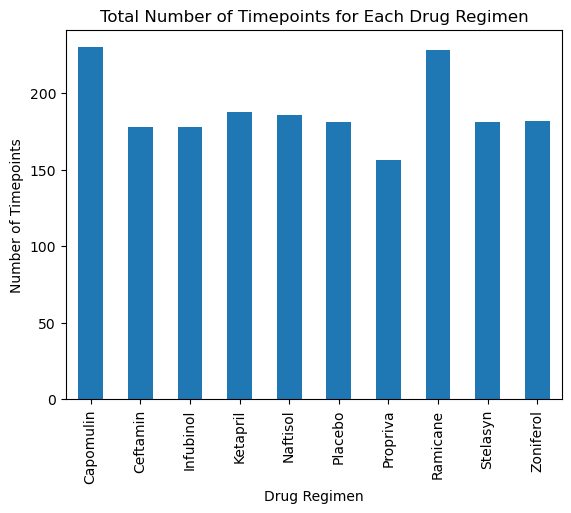

In [27]:
timepoint_counts = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_counts.plot(kind="bar", title="Total Number of Timepoints for Each Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Timepoints")
plt.show()


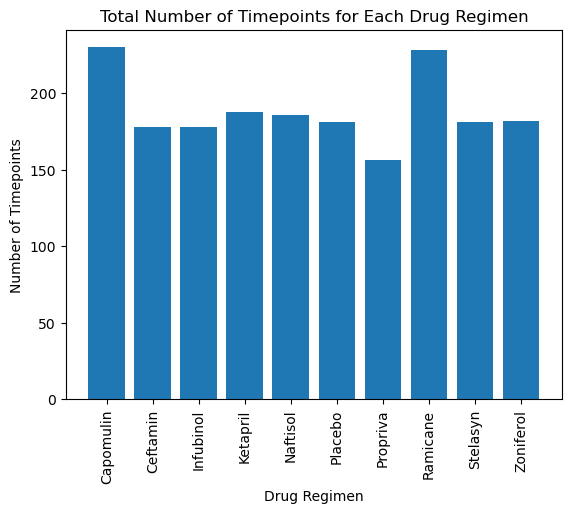

In [28]:
timepoint_counts = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

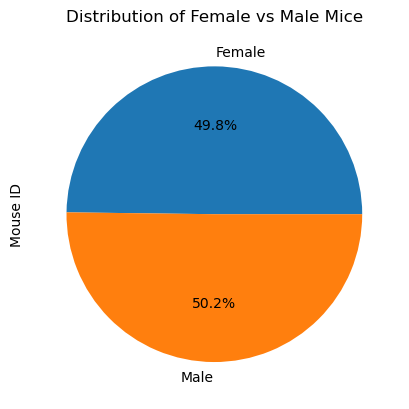

In [29]:
sex_counts = cleaned_df.groupby("Sex")["Mouse ID"].nunique()
sex_counts.plot(kind="pie", title="Distribution of Female vs Male Mice", autopct="%1.1f%%")
plt.ylabel("Mouse ID")
plt.show()


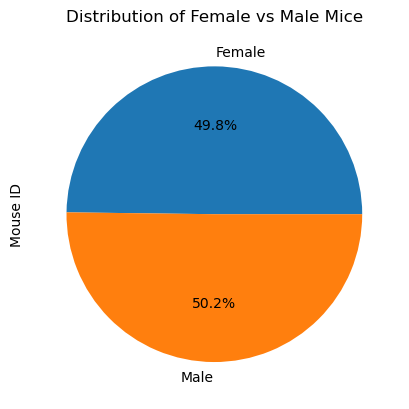

In [30]:
gender_df = merged_df.groupby("Sex")["Mouse ID"].nunique()
gender_df.plot(kind="pie", title="Distribution of Female vs Male Mice", autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
last_timepoints = cleaned_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoints_df = pd.DataFrame(last_timepoints)
merged_last_df = pd.merge(last_timepoints_df, cleaned_df, on=["Mouse ID", "Timepoint"], how="left")
treatments_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = []
for treatment in treatments_of_interest:
    volumes = merged_last_df.loc[merged_last_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    final_tumor_volumes.append(volumes)
for i in range(len(final_tumor_volumes)):
    quartiles = final_tumor_volumes[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"\n{i+1}. {treatments_of_interest[i]}")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The median of tumor volume is: {quartiles[0.5]}")
  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volumes[i][(final_tumor_volumes[i] < lower_bound) | (final_tumor_volumes[i] > upper_bound)]
    if len(outliers) > 0:
        print(f"There are {len(outliers)} potential outliers:")
        print(outliers)
    else:
        print("There are no potential outliers.")



1. Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The median of tumor volume is: 38.1251644
There are no potential outliers.

2. Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The median of tumor volume is: 36.56165229
There are no potential outliers.

3. Infubinol
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The median of tumor volume is: 60.16518046
There are 1 potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

4. Ceftamin
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The me

Capomulin:
  - Lower quartile: 37.69
  - Upper quartile: 45.0
  - Interquartile range: 7.31
  - Median: 41.56
  - Potential outliers: [25.47214326, 23.34359787]
Ramicane:
  - Lower quartile: 36.67
  - Upper quartile: 45.0
  - Interquartile range: 8.33
  - Median: 40.67
  - Potential outliers: [22.05012627]
Infubinol:
  - Lower quartile: 47.31
  - Upper quartile: 57.31
  - Interquartile range: 10.0
  - Median: 51.82
  - Potential outliers: []
Ceftamin:
  - Lower quartile: 47.21
  - Upper quartile: 56.8
  - Interquartile range: 9.59
  - Median: 51.78
  - Potential outliers: []


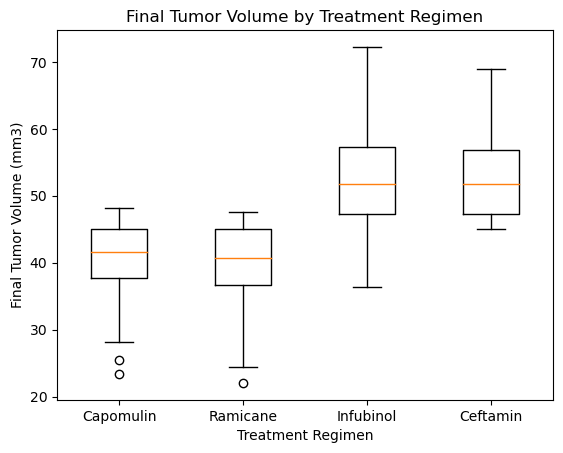

In [32]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []

for treatment in treatments:
    tumor_vol = cleaned_df.loc[cleaned_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    tumor_vol_data.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{treatment}:")
    print(f"  - Lower quartile: {round(lowerq, 2)}")
    print(f"  - Upper quartile: {round(upperq, 2)}")
    print(f"  - Interquartile range: {round(iqr, 2)}")
    print(f"  - Median: {round(quartiles[0.5], 2)}")
    print(f"  - Potential outliers: {outliers.tolist()}")

fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments)
ax.set_title("Final Tumor Volume by Treatment Regimen")
ax.set_xlabel("Treatment Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

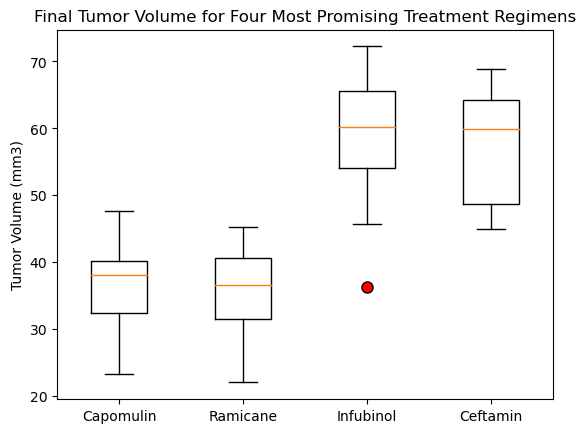

In [33]:
plt.boxplot(final_tumor_volumes, labels=treatments_of_interest, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))
plt.title("Final Tumor Volume for Four Most Promising Treatment Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

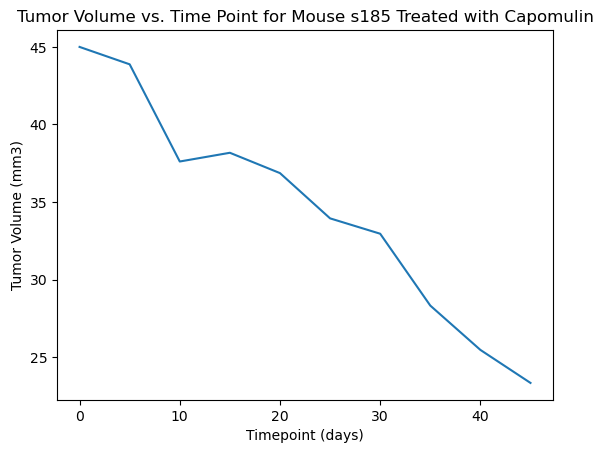

In [34]:
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_df["Mouse ID"].unique()
selected_mouse = capomulin_mice[0]  # Select the first mouse for simplicity
selected_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == selected_mouse, ["Timepoint", "Tumor Volume (mm3)"]]
plt.plot(selected_mouse_df["Timepoint"], selected_mouse_df["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} Treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


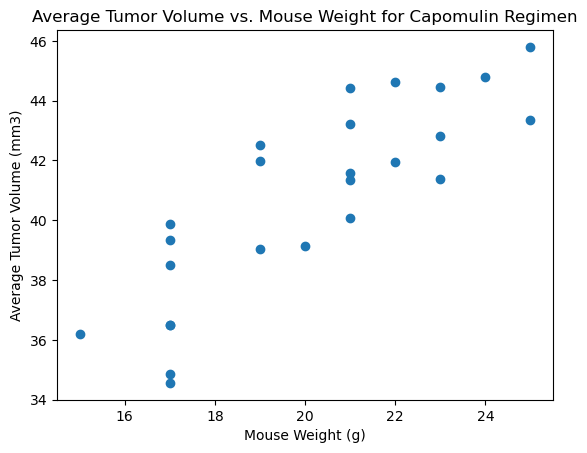

In [35]:
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_weight_volume_df = capomulin_df.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).rename(columns={"Weight (g)": "Mouse Weight (g)", "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
plt.scatter(capomulin_weight_volume_df["Mouse Weight (g)"], capomulin_weight_volume_df["Average Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.
The equation of the regression line is: y = 0.95x + 21.55


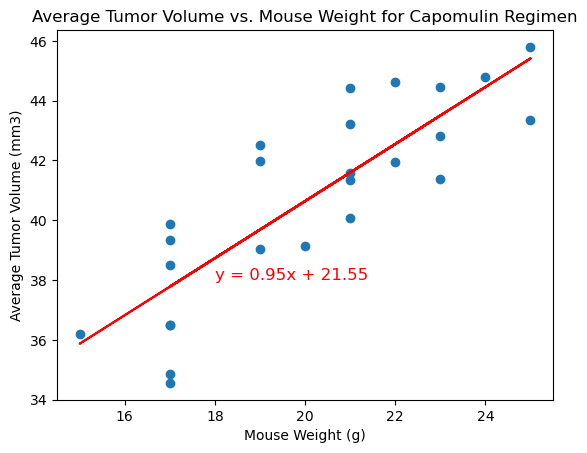

In [36]:
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_weight_volume_df = capomulin_df.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).rename(columns={"Weight (g)": "Mouse Weight (g)", "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
corr_coef = round(st.pearsonr(capomulin_weight_volume_df["Mouse Weight (g)"], capomulin_weight_volume_df["Average Tumor Volume (mm3)"])[0], 2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr_coef}.")
x_values = capomulin_weight_volume_df["Mouse Weight (g)"]
y_values = capomulin_weight_volume_df["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The equation of the regression line is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (18, 38), fontsize=12, color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()